# Q3: Even deeper! Resnet18 for PASCAL classification (15 pts)

Hopefully we all got much better accuracy with the deeper model! Since 2012, much deeper architectures have been proposed. [ResNet](https://arxiv.org/abs/1512.03385) is one of the popular ones. In this task, we attempt to further improve the performance with the “very deep” ResNet-18 architecture.


## 3.1 Build ResNet-18 (1 pts)
Write a network modules for the Resnet-18 architecture (refer to the original paper). You can use `torchvision.models` for this section, so it should be very easy!

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import matplotlib.pyplot as plt
%matplotlib inline

import trainer
from utils import ARGS
from simple_cnn import SimpleCNN
from voc_dataset import VOCDataset


# you could write the whole class....
# or one line :D
ResNet = models.resnet18(pretrained=False)
num_features = ResNet.fc.in_features
ResNet.fc = nn.Linear(num_features, 20)

## 3.2 Add Tensorboard Summaries (6 pts)
You should've already written tensorboard summary generation code into `trainer.py` from q1. However, you probably just added the most basic summary features. Please implement the more advanced summaries listed here:
* training loss (should be done)
* testing MAP curves (should be done)
* learning rate
* histogram of gradients

## 3.3 Train and Test (8 pts)
Use the same hyperparameter settings from Task 2, and train the model for 50 epochs. Report tensorboard screenshots for *all* of the summaries listed above (for image summaries show screenshots at $n \geq 3$ iterations)

**REMEMBER TO SAVE A MODEL AT THE END OF TRAINING**

In [2]:
args = ARGS(epochs=50, batch_size=32, lr=0.0001, 
            use_cuda=True, gamma=0.9, log_every=250,
            val_every=250, test_batch_size=16,
            save_at_end=True, save_freq=10)

model = ResNet
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=args.gamma)
test_ap, test_map = trainer.train(args, model, optimizer, scheduler, model_name='models/q3')
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.655183
test map (validation): 0.07534058953327674
Train Epoch: 1 [250 (59%)]	Loss: 0.218892
test map (validation): 0.177175142631832
Train Epoch: 3 [500 (18%)]	Loss: 0.197915
test map (validation): 0.2207908930041353
Train Epoch: 4 [750 (78%)]	Loss: 0.241303
test map (validation): 0.26692366200772927
Train Epoch: 6 [1000 (37%)]	Loss: 0.178215
test map (validation): 0.2862473268778083
Train Epoch: 7 [1250 (96%)]	Loss: 0.180843
test map (validation): 0.31267821891523273
Train Epoch: 9 [1500 (55%)]	Loss: 0.186540
test map (validation): 0.33858616131199876
Train Epoch: 11 [1750 (15%)]	Loss: 0.164025
test map (validation): 0.3749735587889866
Train Epoch: 12 [2000 (74%)]	Loss: 0.163688
test map (validation): 0.368346408887113
Train Epoch: 14 [2250 (33%)]	Loss: 0.178499
test map (validation): 0.37424829393373515
Train Epoch: 15 [2500 (92%)]	Loss: 0.160320
test map (validation): 0.38319528192067254
Train Epoch: 17 [2750 (52%)]	Loss: 0.177691
test map (validation

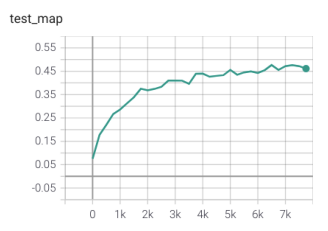

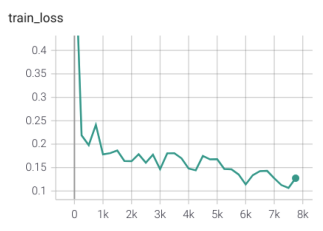

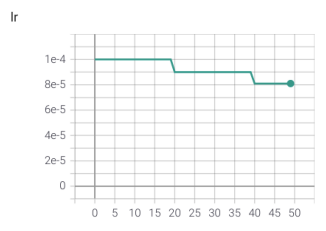

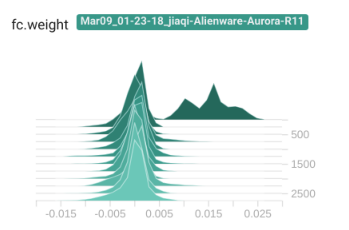

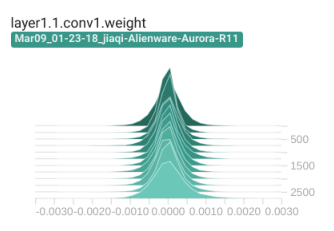

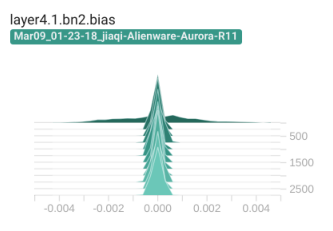

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('q3_1.png')
plt.imshow(img)
plt.axis("off")
plt.show()
img = mpimg.imread('q3_2.png')
plt.imshow(img)
plt.axis("off")
plt.show()
img = mpimg.imread('q3_3.png')
plt.imshow(img)
plt.axis("off")
plt.show()
img = mpimg.imread('q3_4.png')
plt.imshow(img)
plt.axis("off")
plt.show()
img = mpimg.imread('q3_5.png')
plt.imshow(img)
plt.axis("off")
plt.show()
img = mpimg.imread('q3_6.png')
plt.imshow(img)
plt.axis("off")
plt.show()